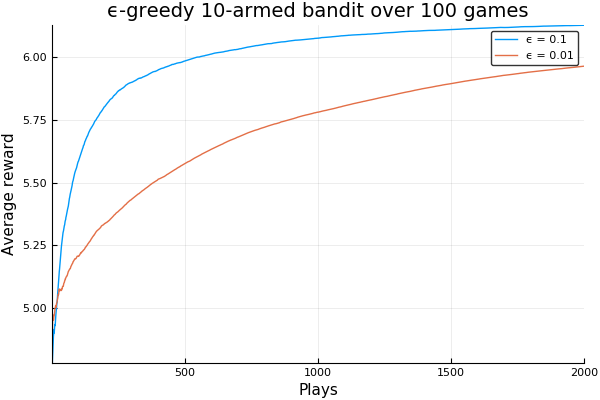

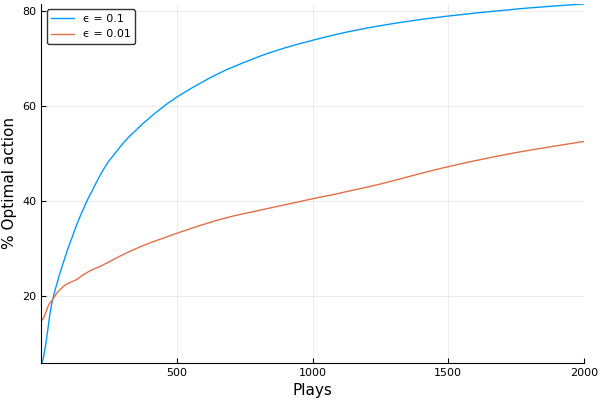

Action rewards = [3.33333, 3.66667, 4.0, 4.33333, 4.66667, 5.0, 5.33333, 5.66667, 6.0, 6.33333]


In [3]:
using Plots


function greedy_bandit(N,T,epsilon,Qmean)
    """
    RUN ONE ϵ-GREEDY GAME OF N-ARMED BANDIT
    
    Arguments:  N - Number of arms (1 x 1)
                T - Number of plays (1 x 1)
                epsilon - Probability of exploration (1 x 1)
                Qmean - (N x 1)
    
    Returns:    reward - History of actions and values (N x T)
                perc_opt - Percentage of optimal actions (T x 1)
    """
    
    # Initialize rewards, action counts, and optimal percentage
    reward = zeros(N,T)
    perc_opt = zeros(T)
    acount = zeros(N)

    # Randomly assign first action and  reward
    a0 = randperm(N)[1]
    reward[a0,1] = randn() + Qmean[a0]
    acount[a0] += 1
    perc_opt[1] = acount[N]*100

    # Assign subsequent actions and rewards
    for t = 2:T
        # Decide greedy or explore
        if rand() > epsilon
            # Greedy approach
            Qstar, astar = findmax(sum(reward,2)./max.(acount,1))
            reward[astar,t] = randn() + Qmean[astar]
            acount[astar] += 1
            perc_opt[t] = acount[N]/t*100
        else
            # Explore approach
            arand = randperm(N)[1]
            reward[arand,t] = randn() + Qmean[arand]
            acount[arand] += 1
            perc_opt[t] = acount[N]/t*100
        end
    end
    
    return reward, perc_opt
end


function main()
    # Set up problem
    N = 10      # N-arm bandit
    T = 2000    # T plays per game

    # Assign mean reward values per arm
    Qmean = collect(10:N+9)/3
    println("Action rewards = ", Qmean)

    # Play ϵ-greedy games
    Ngames = 100
    
    reward_val1 = zeros(T); reward_val2 = zeros(T);
    perc_opt1 = zeros(T); perc_opt2 = zeros(T);
    epsilon1 = 0.1; epsilon2 = 0.01
    
    for i = 1:Ngames
        # ϵ = epsilon1
        reward, perc_opt = greedy_bandit(N,T,epsilon1,Qmean)
        reward_val1 += sum(reward,1)'
        perc_opt1 += perc_opt
        
        # ϵ = epsilon2
        reward, perc_opt = greedy_bandit(N,T,epsilon2,Qmean)
        reward_val2 += sum(reward,1)'
        perc_opt2 += perc_opt
    end
    
    # Calculate average rewards
    avg_reward1 = zeros(T); avg_reward2 = zeros(T);
    
    for t = 1:T
        avg_reward1[t] = sum(reward_val1[1:t])/Ngames/t
        avg_reward2[t] = sum(reward_val2[1:t])/Ngames/t
    end
    
    # Calculate optimal percentages
    perc_opt1 = perc_opt1/Ngames
    perc_opt2 = perc_opt2/Ngames

    pyplot()
    t = 1:T
    
    # Plot average rewards
    plt1 = plot(t,avg_reward1, xlabel="Plays", ylabel="Average reward", label="ϵ = $(epsilon1)")
    plt1 = plot!(t,avg_reward2, label="ϵ = $(epsilon2)")
    title!("ϵ-greedy $N-armed bandit over $(Ngames) games")
    display(plt1)
    
    # Plot optimal percentages
    plt2 = plot(t,perc_opt1, xlabel="Plays", ylabel="% Optimal action", label="ϵ = $(epsilon1)")
    plt2 = plot!(t,perc_opt2, label="ϵ = $(epsilon2)")
    display(plt2)
end


main()